<a href="https://colab.research.google.com/github/Paxtor2/amazon_reviews_EDA/blob/main/amazon_reviews_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#for handling regular expressions
import re

#for handling strings
import string

#for mathematical operations
import math

In [6]:
df = pd.read_csv('reviews.csv')
print('Shape of data =>', df.shape)


Shape of data => (11676, 21)


In [7]:
df = df[['name', 'reviews.text', 'reviews.doRecommend', 'reviews.numHelpful']]
print('Shape of data =>', df.shape)
df.head(5)

Shape of data => (11676, 4)


,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,True,0.0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,True,0.0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,True,0.0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,True,0.0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,True,0.0


In [8]:
df.isnull().sum()

name                     0
reviews.text             1
reviews.doRecommend    430
reviews.numHelpful     422
dtype: int64

In [9]:
df.dropna(inplace=True)
df.isnull().sum()

name                   0
reviews.text           0
reviews.doRecommend    0
reviews.numHelpful     0
dtype: int64

In [10]:
df = df.groupby('name').filter(lambda x:len(x)>500).reset_index(drop=True)
print('Number of products=>', len(df['name'].unique()))

Number of products=> 2


In [11]:
df['reviews.doRecommend'] = df['reviews.doRecommend'].astype(int)
df['reviews.numHelpful'] = df['reviews.numHelpful'].astype(int)

### Cleaning Text Data

In [12]:
df['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta'],
      dtype=object)

In [13]:
df['name'] = df['name'].apply(lambda x: x.split(',,,')[0])

In [14]:
df['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta'],
      dtype=object)

In [15]:
for index, text in enumerate(df['reviews.text'][35:40]):
    print('Review %d:\n'%(index+1), text)

Review 1:
 I love everything about this tablet! The imaging is sharp and clear. It's fast and light weight. Love it!
Review 2:
 Overall a nice product for traveling purposes Value for money
Review 3:
 My children love this table great quality of pictures, excellent camera
Review 4:
 I bought 3 tablets and my family was not disappointed.
Review 5:
 Great tablet fast screen good size never gives me problem


### Expand Contractions

In [16]:
contractions_dict = {"ain't":"are not", "'s": "is", "aren't" : "are not", "can't":"cannot", "can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [17]:

contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
#contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(text, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

#We are going to expand contractions in the reviews
df['reviews.text']=df['reviews.text'].apply(lambda x: expand_contractions(x))

In [18]:
df['cleaned'] = df['reviews.text'].apply(lambda x: x.lower())

### Remove digits and words containing digits

In [19]:
df['cleaned'] = df['cleaned'].apply(lambda x: re.sub('\w*\d\w*', '', x))

### Remove Punctuation marks

In [20]:
df['cleaned'] = df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
#We have to remove extra spaces left
df['cleaned'] = df['cleaned'].apply(lambda x: re.sub(' +', ' ', x))

### Prepare Text Data for Exploratory Data Analysis

In [21]:
# We are going to start with stopwords removal
# We will use spact for this purpose
import spacy


# Let us load the model

nlp = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])

#Lemmatization with stopwords removal
df['lemmatized'] = df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False )]))

In [22]:
# We are going to group the reviews according to the products
df_grouped = df[['name', 'lemmatized']].groupby(by='name').agg(lambda x: ' '.join(x))
df_grouped.head()

,lemmatized
name,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",product far disappoint child love use like abi...
"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta",sale people nice knowledgeable come great prod...


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6fba8280-365f-4a00-b0b9-b529d9d77140' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

**Create a Document Term Matrix**

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='word')
data = cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns = cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,abandon,abattery,abc,abcis,abcmouse,abcmousecom,abd,ability,abilty,abit,able,abount,abroad,absofbe,absolute,absolutely,abundance,abundant,abuse,ac,acc,acce,accent,accept,acceptable,acceptance,accesible,access,accessabilitylove,accessbig,accessble,accessibility,accessible,accessory,accident,accidental,accidentally,accidentand,accidently,acclimate,...,yearswhat,yeeeeaaaahhhhh,yer,yera,yes,yesterday,yesterdayis,yetthis,yhis,yield,yo,yoga,york,youand,yougo,young,younger,youngster,youreyesprobably,yous,youse,youso,youth,youtube,youtubeand,youtubegmail,youtubeis,youtubekid,youversion,yr,yrold,yrs,yup,zeepad,zero,zinio,zippy,zone,zoo,zoom
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",0,0,0,0,0,0,0,24,0,1,77,1,0,0,3,33,0,0,2,0,1,1,0,2,0,0,0,73,0,0,0,1,1,0,0,2,0,0,2,0,...,1,0,1,0,6,0,1,0,0,0,1,1,1,1,0,20,0,0,1,0,0,0,1,37,0,0,0,0,0,23,0,3,0,0,4,1,0,0,0,0
"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta",1,1,7,1,1,1,1,52,1,0,283,0,2,1,5,103,2,1,4,1,0,0,1,7,12,1,1,185,1,1,1,3,4,3,4,3,6,1,1,1,...,0,1,0,1,23,2,0,1,1,1,8,0,0,0,1,143,1,1,0,1,1,1,3,91,1,1,1,1,1,82,2,14,1,2,3,0,1,2,1,4


## **`Time for the main business! Exploratory Data Analysis(EDA)`**



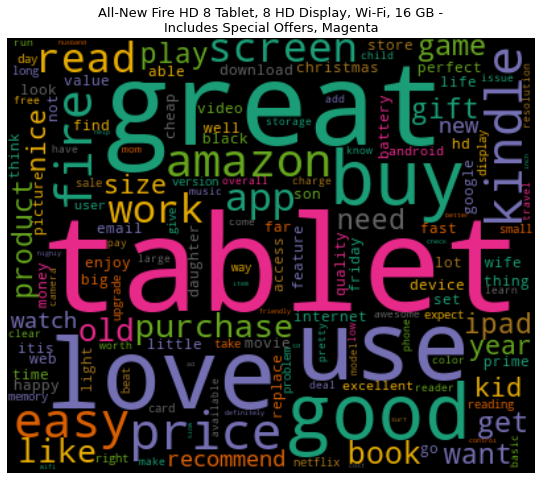

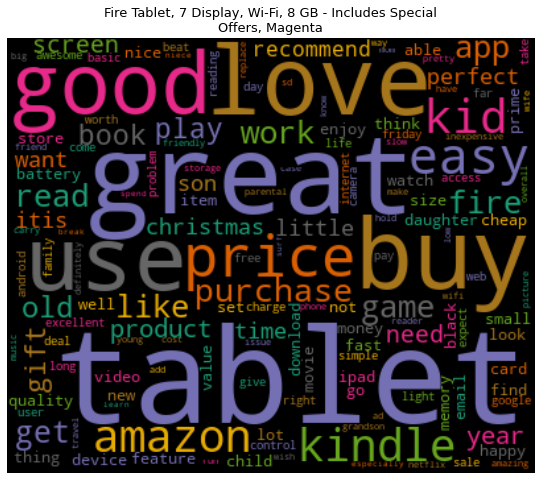

In [24]:
# Importing wordcloud and text wrap
from wordcloud import WordCloud
from textwrap import wrap

def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150, colormap='Dark2').generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis('off')
  plt.title('\n'.join(wrap(title,60)), fontsize=13)
  plt.show()

#Transposing document term matrix
df_dtm=df_dtm.transpose()

#Plotting wordcloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False), product)

## **Let's do some Sentiment Analysis**

In [25]:
# We can check the polarity of a review using TextBlob
from textblob import TextBlob
df['polarity']=df['lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [26]:
# We wil look at 3 random reviews with Highest Polarity
print('3 Random Reviews with Highest Polarity:')
for index, review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['reviews.text']):
  print('Review {}:\n'.format(index+1), review)

3 Random Reviews with Highest Polarity:
Review 1:
 Was looking for tablet to read books and this is perfect for that.
Review 2:
 The Picture awesome. Memory card can be installed.
Review 3:
 Perfect for taking on vacation and with memory cards I can take all the pics I want.


In [27]:
# We wil look at 3 random reviews with Lowest Polarity
print('3 Random Reviews with Lowest Polarity:')
for index, review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['reviews.text']):
  print('Review {}:\n'.format(index+1), review)

3 Random Reviews with Lowest Polarity:
Review 1:
 Bought it so my son would stop grabbing for my phone. Does what it needs to but battery life is horrible
Review 2:
 I hate it, there is not any organization for the apps
Review 3:
 My daughter wanted this product for herself. I got this unit based on the price and size.


In [42]:
# Let us plot polarities of reviews for each product and review them

product_polarity_sorted=pd.DataFrame(df.groupby('name')['polarity'].count())
print(len(product_polarity_sorted.index))
print(len(df['polarity']))
# plt.figure(figsize=(16,8))
# plt.xlabel('Polarity')
# plt.ylabel('Products')
# plt.title('Polarity of Different Amazon Product Reviews')
# print(len(product_polarity_sorted.index))
# polarity_graph = plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'], color = 'purple')

# # We are going to write the products names on the bars 
# for bar, product in zip(polarity_graph, product_polarity_sorted.index):
#   plt.text(0.005, bar.get_y()+bar.get_width(),'{}'.format(product), va='center',fontsize=11, color='white')

# # We are going to display the polarity values on the graph
# for bar, polarity in zip(polarity_graph, product_polarity_sorted['polarity']):
#   plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity, va='center', fontsize=11,color='black')

# plt.yticks([])
# plt.show()

2
11006


In [45]:
!pip install textstat==0.7.1

     |████████████████████████████████| 99 kB 6.9 MB/s 
     |████████████████████████████████| 2.0 MB 48.0 MB/s 


In [51]:
# Now we are going to check the readability of the reviews
# We will use textstat library in Python

import textstat
df['dale_chall_score']=df['reviews.text'].apply(lambda x: textstat.dale_chall_readability_score(x))
df['flesch_reading_ease']=df['reviews.text'].apply(lambda x: textstat.flesch_reading_ease(x))
df['gunning_fog']=df['reviews.text'].apply(lambda x: textstat.gunning_fog(x))

print('Dale Chall score of upvoted reviews=>', df[df['reviews.numHelpful']>1]['dale_chall_score'].mean())
print('Dale Chall score of not upvoted reviews=>', df[df['reviews.numHelpful']<=1]['dale_chall_score'].mean())

print('Flesch Reading score of upvoted reviews=>', df[df['reviews.numHelpful']>1]['flesch_reading_ease'].mean())
print('Flesch Reading score of upvoted reviews=>', df[df['reviews.numHelpful']<=1]['flesch_reading_ease'].mean())

print('Gunning Fog score of upvoted reviews=>', df[df['reviews.numHelpful']>1]['gunning_fog'].mean())
print('Gunning Fog score of upvoted reviews=>', df[df['reviews.numHelpful']<=1]['gunning_fog'].mean())


Dale Chall score of upvoted reviews=> 5.87381609195402
Dale Chall score of not upvoted reviews=> 5.534481127613184
Flesch Reading score of upvoted reviews=> 83.90590804597694
Flesch Reading score of upvoted reviews=> 86.53480843817975
Gunning Fog score of upvoted reviews=> 7.548850574712642
Gunning Fog score of upvoted reviews=> 6.668396556617135


In [52]:
# We are going to use the text standard function to get a clear insight 

df['text_standard']=df['reviews.text'].apply(lambda x: textstat.text_standard(x))
print('Text Standard of upvoted reviews=>', df[df['reviews.numHelpful']>1]['text_standard'].mode())
print('Text Standard of not upvoted reviews=>', df[df['reviews.numHelpful']<=1]['text_standard'].mode())

Text Standard of upvoted reviews=> 0    5th and 6th grade
dtype: object
Text Standard of not upvoted reviews=> 0    5th and 6th grade
dtype: object


The result above shows that the upvoted and not upvoted reviews can be understood by anyone that has completed 5th or 6th grade in school

In [53]:
# Now we will take a look at the reading time of the reviews 
df['reading_time']=df['reviews.text'].apply(lambda x: textstat.reading_time(x))

print('Reading time of upvoted reviews=>', df[df['reviews.numHelpful']>1]['reading_time'].mean())
print('Reading time of not upvoted reviews=>', df[df['reviews.numHelpful']<=1]['reading_time'].mean())

Reading time of upvoted reviews=> 3.485172413793107
Reading time of not upvoted reviews=> 1.6845492384826442


  What the above result is telling us is that people find longer reviews more helpful